# Part 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

In [2]:
G = nx.read_graphml('london.graph')

In [89]:
type(G)

networkx.classes.graph.Graph

In [3]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
__str__
_adj
__repr__
__new__
__iter__
add_node
update
nbunch_iter
__doc__
__dir__


In [91]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [4]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [3]:
# Retrieve the identifier and attributes of the first node
node_id, attributes = list(G.nodes(data=True))[0]

# Convert the coordinates from string to tuple
coords_str = attributes['coords']
coords_tuple = tuple(map(float, coords_str.strip('()').split(',')))

# Create the new attributes dictionary
new_attributes = {'station_name': node_id, 'coords': coords_tuple}

# Output the result
print(new_attributes)

    

{'station_name': 'Wembley Park', 'coords': (519316.5590174915, 186389.32981656672)}


In [4]:
# Iterate over all nodes in the graph
for node_id, attributes in G.nodes(data=True):
    # Extract station name and coordinates from the attributes
    station_name = node_id
    coords_str = attributes['coords']
    coords_tuple = tuple(map(float, coords_str.strip('()').split(',')))

    # Update the node's attributes with the new format
    G.nodes[node_id]['station_name'] = station_name
    G.nodes[node_id]['coords'] = coords_tuple



In [7]:
# To check node attributes:
list(G.nodes(data = True))[1]

('Kingsbury',
 {'coords': (519359.9688603217, 188721.22027255083),
  'station_name': 'Kingsbury'})

In [5]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'station_1_': 'Wembley Park',
  'station_2_': 'Kingsbury'})

In [6]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,length,station_2_,flows,station_1_
0,Wembley Park,Kingsbury,Jubilee,2916.771558,Kingsbury,12356,Wembley Park
1,Wembley Park,Neasden,Jubilee,2353.165938,Neasden,6744,Wembley Park
2,Wembley Park,Preston Road,Metropolitan,1419.735166,Preston Road,36601,Wembley Park
3,Wembley Park,Finchley Road,Metropolitan,7266.373927,Finchley Road,55216,Wembley Park
4,Kingsbury,Queensbury,Jubilee,1245.995234,Queensbury,9419,Kingsbury
5,Queensbury,Canons Park,Jubilee,1693.307343,Canons Park,6385,Queensbury
6,Canons Park,Stanmore,Jubilee,1419.669476,Stanmore,3624,Canons Park
7,Stratford,West Ham,Jubilee,1673.509515,West Ham,91801,Stratford
8,Stratford,Mile End,Central,2805.001392,Mile End,12010,Stratford
9,Stratford,Leyton,Central,2131.342926,Leyton,56082,Stratford


## Centrality Measures

### Degree Centrality

In [9]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [10]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


### Betweenness Centrality

In [11]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


### Closeness Centrality

In [12]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [ ]:
## Impact measures

### A) Non-sequential removal:

In [ ]:
#### for Degree Centrality

In [111]:
import networkx as nx
import numpy as np

# Remove the "Stratford" node
G_copy = G.copy()
G_copy.remove_node("Stratford")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Stratford.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Stratford: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Stratford: {lcc}")

Average Shortest Path Length (ASPL) after removing Stratford: 13.98
Largest Connected Component (LCC) after removing Stratford: 379


In [112]:


# Remove the "Bank and Monument" node
G_copy = G.copy()
G_copy.remove_node("Bank and Monument")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Bank and Monument.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Bank and Monument: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Bank and Monument: {lcc}")

Average Shortest Path Length (ASPL) after removing Bank and Monument: 14.13
Largest Connected Component (LCC) after removing Bank and Monument: 400


In [113]:
# Remove the "King's Cross St. Pancras" node
G_copy = G.copy()
G_copy.remove_node("King's Cross St. Pancras")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing King's Cross St. Pancras.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing King's Cross St. Pancras: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing King's Cross St. Pancras: {lcc}")

Average Shortest Path Length (ASPL) after removing King's Cross St. Pancras: 14.25
Largest Connected Component (LCC) after removing King's Cross St. Pancras: 400


In [114]:
# Remove the "Baker Street" node
G_copy = G.copy()
G_copy.remove_node("Baker Street")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Baker Street.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Baker Street: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Baker Street: {lcc}")

Average Shortest Path Length (ASPL) after removing Baker Street: 14.38
Largest Connected Component (LCC) after removing Baker Street: 400


In [115]:
# Remove the "Earl's Court" node
G_copy = G.copy()
G_copy.remove_node("Earl's Court")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Earl's Court.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Earl's Court: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Earl's Court: {lcc}")

Average Shortest Path Length (ASPL) after removing Earl's Court: 13.83
Largest Connected Component (LCC) after removing Earl's Court: 400


In [116]:
# Remove the "Oxford Circus" node
G_copy = G.copy()
G_copy.remove_node("Oxford Circus")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Oxford Circus.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Oxford Circus: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Oxford Circus: {lcc}")

Average Shortest Path Length (ASPL) after removing Oxford Circus: 13.61
Largest Connected Component (LCC) after removing Oxford Circus: 400


In [117]:
# Remove the "Liverpool Street" node
G_copy = G.copy()
G_copy.remove_node("Liverpool Street")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Liverpool Street.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Liverpool Street: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Liverpool Street: {lcc}")

Average Shortest Path Length (ASPL) after removing Liverpool Street: 14.10
Largest Connected Component (LCC) after removing Liverpool Street: 400


In [118]:
# Remove the "Waterloo" node
G_copy = G.copy()
G_copy.remove_node("Waterloo")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Waterloo.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Waterloo: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Waterloo: {lcc}")

Average Shortest Path Length (ASPL) after removing Waterloo: 13.96
Largest Connected Component (LCC) after removing Waterloo: 400


In [119]:
# Remove the "Green Park" node
G_copy = G.copy()
G_copy.remove_node("Green Park")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Green Park.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Green Park: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Green Park: {lcc}")

Average Shortest Path Length (ASPL) after removing Green Park: 13.82
Largest Connected Component (LCC) after removing Green Park: 400


In [120]:
# Remove the "Canning Town" node
G_copy = G.copy()
G_copy.remove_node("Canning Town")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Canning Town.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Canning Town: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Canning Town: {lcc}")

Average Shortest Path Length (ASPL) after removing Canning Town: 13.17
Largest Connected Component (LCC) after removing Canning Town: 387


### For Betweenness Centrality (calculate nodes in first 10th of Betweenness Centrality but not in Degree Centrality)

In [121]:
# Remove the "Euston" node
G_copy = G.copy()
G_copy.remove_node("Euston")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Euston.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Euston: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Euston: {lcc}")

Average Shortest Path Length (ASPL) after removing Euston: 13.25
Largest Connected Component (LCC) after removing Euston: 378


In [122]:
# Remove the "Westminster" node
G_copy = G.copy()
G_copy.remove_node("Westminster")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Westminster.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Westminster: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Westminster: {lcc}")

Average Shortest Path Length (ASPL) after removing Westminster: 13.85
Largest Connected Component (LCC) after removing Westminster: 400


In [123]:
# Remove the "Finchley Road" node
G_copy = G.copy()
G_copy.remove_node("Finchley Road")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Finchley Road.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Finchley Road: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Finchley Road: {lcc}")

Average Shortest Path Length (ASPL) after removing Finchley Road: 14.55
Largest Connected Component (LCC) after removing Finchley Road: 400


### For Closeness Centrality (calculate nodes in first 10th of Closeness Centrality but not in Degree Centrality and Betweenness Centrality)

In [124]:
# Remove the "Bond Street" node
G_copy = G.copy()
G_copy.remove_node("Bond Street")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Bond Street.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Bond Street: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Bond Street: {lcc}")

Average Shortest Path Length (ASPL) after removing Bond Street: 13.73
Largest Connected Component (LCC) after removing Bond Street: 400


In [125]:
# Remove the "Farringdon" node
G_copy = G.copy()
G_copy.remove_node("Farringdon")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Farringdon.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Farringdon: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Farringdon: {lcc}")

Average Shortest Path Length (ASPL) after removing Farringdon: 13.57
Largest Connected Component (LCC) after removing Farringdon: 400


In [126]:
# Remove the "Angel" node
G_copy = G.copy()
G_copy.remove_node("Angel")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Angel.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Angel: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Angel: {lcc}")

Average Shortest Path Length (ASPL) after removing Angel: 13.57
Largest Connected Component (LCC) after removing Angel: 400


In [127]:
# Remove the "Moorgate" node
G_copy = G.copy()
G_copy.remove_node("Moorgate")

# Calculate the ASPL
connected_components = list(nx.connected_components(G_copy))
total_nodes = G_copy.number_of_nodes()

aspl = 0
for component in connected_components:
    subgraph = G_copy.subgraph(component)
    sp_lengths = []
    for node1 in component:
        for node2 in component:
            if node1 != node2:
                try:
                    sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                    sp_lengths.append(sp_length)
                except nx.exception.NetworkXNoPath:
                    pass
    if sp_lengths:
        component_aspl = np.mean(sp_lengths)
        aspl += len(component) / total_nodes * component_aspl

if aspl == 0:
    print("The graph is completely disconnected after removing Moorgate.")
else:
    print(f"Average Shortest Path Length (ASPL) after removing Moorgate: {aspl:.2f}")

# Calculate the LCC
lcc = max(len(c) for c in connected_components)
print(f"Largest Connected Component (LCC) after removing Moorgate: {lcc}")

Average Shortest Path Length (ASPL) after removing Moorgate: 13.74
Largest Connected Component (LCC) after removing Moorgate: 400


##B) Sequential Removal

In [13]:
# Define the centrality measures
def degree_centrality(G):
    return dict(nx.degree_centrality(G))

def betweenness_centrality(G):
    return dict(nx.betweenness_centrality(G))

def closeness_centrality(G):
    return dict(nx.closeness_centrality(G))

# Define the impact measures
def average_shortest_path_length(G):
    connected_components = list(nx.connected_components(G))
    total_nodes = G.number_of_nodes()
    aspl = 0
    for component in connected_components:
        subgraph = G.subgraph(component)
        sp_lengths = []
        for node1 in component:
            for node2 in component:
                if node1 != node2:
                    try:
                        sp_length = nx.shortest_path_length(subgraph, source=node1, target=node2)
                        sp_lengths.append(sp_length)
                    except nx.exception.NetworkXNoPath:
                        pass
        if sp_lengths:
            component_aspl = np.mean(sp_lengths)
            aspl += len(component) / total_nodes * component_aspl
    return aspl

def largest_connected_component(G):
    connected_components = list(nx.connected_components(G))
    return max(len(c) for c in connected_components)

# Sequential node removal
G_copy = G.copy()
centrality_measures = [degree_centrality, betweenness_centrality, closeness_centrality]
for measure in centrality_measures:
    print(f"Removing nodes based on {measure.__name__}:")
    centrality = measure(G_copy)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    aspl_values = []
    lcc_values = []
    for i in range(10):
        node_to_remove = sorted_centrality[i][0]
        G_copy.remove_node(node_to_remove)
        aspl = average_shortest_path_length(G_copy)
        lcc = largest_connected_component(G_copy)
        aspl_values.append(aspl)
        lcc_values.append(lcc)
        print(f"Removed node: {node_to_remove}, ASPL: {aspl:.2f}, LCC: {lcc}")
        G_copy = G.copy()  # Restore the original graph
    print(f"ASPL values: {aspl_values}")
    print(f"LCC values: {lcc_values}")

Removing nodes based on degree_centrality:
Removed node: Stratford, ASPL: 13.98, LCC: 379
Removed node: Bank and Monument, ASPL: 14.13, LCC: 400
Removed node: Baker Street, ASPL: 14.38, LCC: 400
Removed node: King's Cross St. Pancras, ASPL: 14.25, LCC: 400
Removed node: West Ham, ASPL: 14.05, LCC: 400
Removed node: Canning Town, ASPL: 13.17, LCC: 387
Removed node: Waterloo, ASPL: 13.96, LCC: 400
Removed node: Green Park, ASPL: 13.82, LCC: 400
Removed node: Oxford Circus, ASPL: 13.61, LCC: 400
Removed node: Liverpool Street, ASPL: 14.10, LCC: 400
ASPL values: [13.976436229462545, 14.130739348370927, 14.384624060150376, 14.250889724310777, 14.047167919799499, 13.169196891191712, 13.960802005012532, 13.82453634085213, 13.614924812030075, 14.100338345864662]
LCC values: [379, 400, 400, 400, 400, 387, 400, 400, 400, 400]
Removing nodes based on betweenness_centrality:
Removed node: Stratford, ASPL: 13.98, LCC: 379
Removed node: Bank and Monument, ASPL: 14.13, LCC: 400
Removed node: Liverpoo

Non-sequential removal based on degree_centrality:
Removed node: Stratford, ASPL: 13.98, LCC: 379
Removed node: Bank and Monument, ASPL: 14.13, LCC: 400
Removed node: Baker Street, ASPL: 14.38, LCC: 400
Removed node: King's Cross St. Pancras, ASPL: 14.25, LCC: 400
Removed node: West Ham, ASPL: 14.05, LCC: 400
Removed node: Canning Town, ASPL: 13.17, LCC: 387
Removed node: Waterloo, ASPL: 13.96, LCC: 400
Removed node: Green Park, ASPL: 13.82, LCC: 400
Removed node: Oxford Circus, ASPL: 13.61, LCC: 400
Removed node: Liverpool Street, ASPL: 14.10, LCC: 400
Non-sequential removal based on betweenness_centrality:
Removed node: Stratford, ASPL: 13.98, LCC: 379
Removed node: Bank and Monument, ASPL: 14.13, LCC: 400
Removed node: Liverpool Street, ASPL: 14.10, LCC: 400
Removed node: King's Cross St. Pancras, ASPL: 14.25, LCC: 400
Removed node: Waterloo, ASPL: 13.96, LCC: 400
Removed node: Green Park, ASPL: 13.82, LCC: 400
Removed node: Euston, ASPL: 13.25, LCC: 378
Removed node: Westminster, A

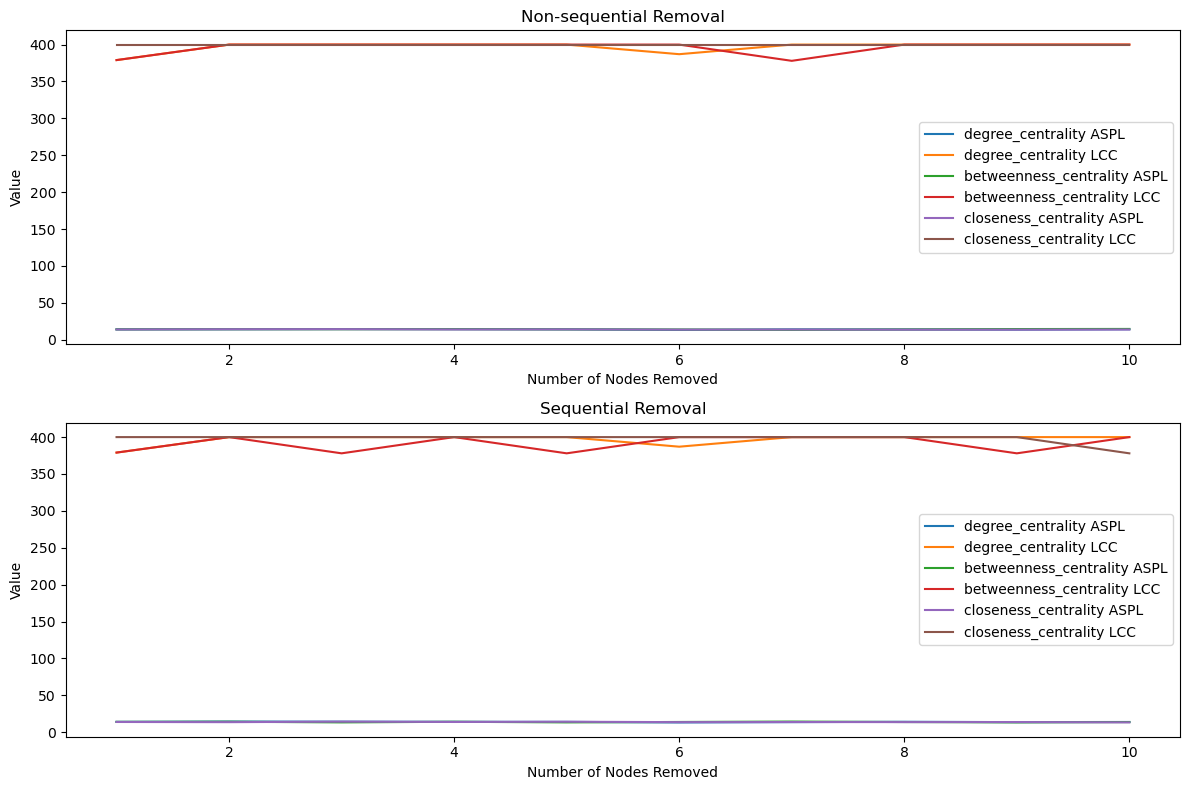

In [14]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Non-sequential removal
for measure in centrality_measures:
    print(f"Non-sequential removal based on {measure.__name__}:")
    centrality = measure(G)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    aspl_values = []
    lcc_values = []
    G_copy = G.copy()
    for i in range(10):
        node_to_remove = sorted_centrality[i][0]
        G_copy.remove_node(node_to_remove)
        aspl = average_shortest_path_length(G_copy)
        lcc = largest_connected_component(G_copy)
        aspl_values.append(aspl)
        lcc_values.append(lcc)
        print(f"Removed node: {node_to_remove}, ASPL: {aspl:.2f}, LCC: {lcc}")
        G_copy = G.copy()  # Restore the original graph
    ax1.plot(range(1, 11), aspl_values, label=measure.__name__ + " ASPL")
    ax1.plot(range(1, 11), lcc_values, label=measure.__name__ + " LCC")


# Sequential removal
for measure in centrality_measures:
    print(f"Sequential removal based on {measure.__name__}:")
    centrality = measure(G)
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    aspl_values = []
    lcc_values = []
    G_copy = G.copy()
    for i in range(10):
        node_to_remove = sorted_centrality[i][0]
        G_copy.remove_node(node_to_remove)
        aspl = average_shortest_path_length(G_copy)
        lcc = largest_connected_component(G_copy)
        aspl_values.append(aspl)
        lcc_values.append(lcc)
        print(f"Removed node: {node_to_remove}, ASPL: {aspl:.2f}, LCC: {lcc}")
        centrality = measure(G_copy)
        sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        G_copy = G.copy()  # Restore the original graph

    ax2.plot(range(1, 11), aspl_values, label=measure.__name__ + " ASPL")
    ax2.plot(range(1, 11), lcc_values, label=measure.__name__ + " LCC")

# Set plot titles, labels, and legend
ax1.set_title("Non-sequential Removal")
ax2.set_title("Sequential Removal")
for ax in (ax1, ax2):
    ax.set_xlabel("Number of Nodes Removed")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()
plt.show()

##II. Flows: weighted network

###II.1.Centrality measures

In [7]:
import pandas as pd

df = pd.read_csv('london_flows.csv')


In [8]:
import networkx as nx

G_weighted = nx.Graph()

for i, row in df.iterrows():
    G_weighted.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

In [9]:
# Combine the unweighted and weighted graphs
G_combined = nx.compose(G, G_weighted)


In [10]:
# Centrality measures
def degree_centrality(G):
    return dict(nx.degree_centrality(G))

def betweenness_centrality(G):
    return dict(nx.betweenness_centrality(G))

def closeness_centrality(G):
    return dict(nx.closeness_centrality(G))

In [15]:
# Weighted degree centrality
weighted_degree = dict(G_weighted.degree(weight='weight'))
num_nodes = G_weighted.number_of_nodes()
weighted_degree_centrality = {node: degree/(num_nodes-1) for node, degree in weighted_degree.items()}
nx.set_node_attributes(G_weighted, weighted_degree_centrality, 'weighted_degree_centrality')


In [16]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G_weighted.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['weighted_degree_centrality'] = pd.Series(nx.get_node_attributes(G_weighted, 'weighted_degree_centrality'))

df_sorted = df.sort_values(["weighted_degree_centrality"], ascending=False)
df_sorted[0:10]

,station_name,weighted_degree_centrality
Bank and Monument,Bank and Monument,193.359296
Waterloo,Waterloo,168.407035
Stratford,Stratford,149.349246
Canary Wharf,Canary Wharf,132.623116
Liverpool Street,Liverpool Street,126.216080
Victoria,Victoria,92.412060
London Bridge,London Bridge,84.771357
King's Cross St. Pancras,King's Cross St. Pancras,79.542714
Paddington,Paddington,58.231156
Oxford Circus,Oxford Circus,57.783920


In [17]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the flows between stations:

bet_london_w=nx.betweenness_centrality(G_weighted,weight='weight',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G_weighted,bet_london_w,'betweenness_w')


In [18]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G_weighted.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G_weighted, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
West Ham,West Ham,9.694526e+93
West Brompton,West Brompton,5.748984e+93
Shepherd's Bush,Shepherd's Bush,2.825892e+93
Kew Gardens,Kew Gardens,1.637767e+93
Surrey Quays,Surrey Quays,8.273506e+92
Kenton,Kenton,6.373616e+92
Richmond,Richmond,6.086318e+92
Willesden Junction,Willesden Junction,2.206631e+92
Kentish Town West,Kentish Town West,1.419265e+92
Stratford,Stratford,1.076285e+92


In [40]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G_weighted, distance='weight')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G_weighted,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G_weighted.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G_weighted, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
Abbey Road,Abbey Road,5.605634
Ruislip Manor,Ruislip Manor,5.605634
Swiss Cottage,Swiss Cottage,5.605634
Sudbury Town,Sudbury Town,5.605634
Sudbury Hill,Sudbury Hill,5.605634
Stockwell,Stockwell,5.605634
Stepney Green,Stepney Green,5.605634
Stamford Brook,Stamford Brook,5.605634
St. Paul's,St. Paul's,5.605634
St. John's Wood,St. John's Wood,5.605634


## node removal for weighted centrality

####top_stations = 'Abbey Road', 'Ruislip Manor', 'Swiss Cottage']
